# Titanic Data Analytics Project - Kaggle

Beichuan(Crystal) Liu

2017.01.10

In this Kaggle challenge, I need to complete the analysis of what sorts of people were likely to survive. 

#### Data Dictionary (Variable	Definition	Key)
*  survival	Survival	0 = No, 1 = Yes
*  pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
*  sex	Sex	
*  Age	Age in years	
*  sibsp	# of siblings / spouses aboard the Titanic	
*  parch	# of parents / children aboard the Titanic	
*  ticket	Ticket number	
*  fare	Passenger fare	
*  cabin	Cabin number	
*  embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

pclass: A proxy for socio-economic status (SES)
*  1st = Upper
*  2nd = Middle
*  3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
*  Sibling = brother, sister, stepbrother, stepsister
*  Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
*  Parent = mother, father
*  Child = daughter, son, stepdaughter, stepson
*  Some children travelled only with a nanny, therefore parch=0 for them.

## Load and Browse Data

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
td = pd.read_csv('data/train.csv')

In [4]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## EDA - Numeric Variables

In [13]:
nuvar = ['Age','SibSp','Parch','Fare']

#### Age
From the univariate distribution plot, most of the people are between 20ish to 40ish

In [14]:
td['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
28.00    25
21.00    24
25.00    23
36.00    22
29.00    20
32.00    18
27.00    18
35.00    18
26.00    18
16.00    17
31.00    17
20.00    15
33.00    15
23.00    15
34.00    15
39.00    14
17.00    13
42.00    13
40.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
47.00     9
         ..
71.00     2
59.00     2
63.00     2
0.83      2
30.50     2
70.00     2
57.00     2
0.75      2
13.00     2
10.00     2
64.00     2
40.50     2
32.50     2
45.50     2
20.50     1
24.50     1
0.67      1
14.50     1
0.92      1
74.00     1
34.50     1
80.00     1
12.00     1
36.50     1
53.00     1
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [28]:
age = td['Age'].dropna() # do it since seaborn can't create plot with NaN in the variable

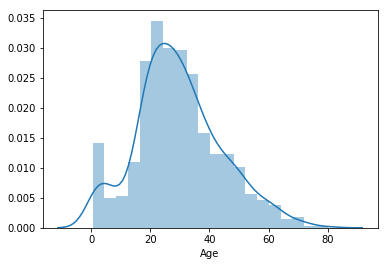

In [30]:
sns.distplot(age)

#### Fill in Missing Values in Age

In [60]:
age_1 = td['Age'].interpolate(method='linear')
age_2 = td['Age'].interpolate(method='pchip')
age_3 = td['Age'].interpolate(method='cubic')

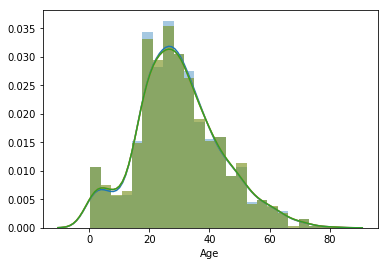

In [62]:
#sns.distplot(age_1)
sns.distplot(age_2)
#sns.distplot(age_2)

The three methods get similar results. Source: https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [63]:
td['Age_all'] = td['Age']. interpolate(method='pchip')

#### SibSp
About 3/4 of the people has no sibling or spouse, about 1/4 has one sibling or spouse.

In [33]:
td['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

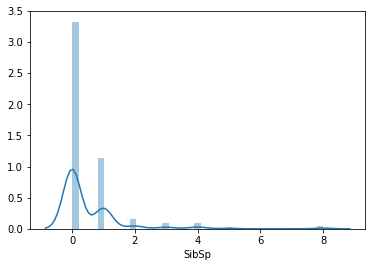

In [34]:
sns.distplot(td['SibSp'])

#### Parch
About 2/3 of the people has no parents/children, this includs some children traveling with only nanny. And about 1/3 of the people has one to two parents or children.

In [35]:
td['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

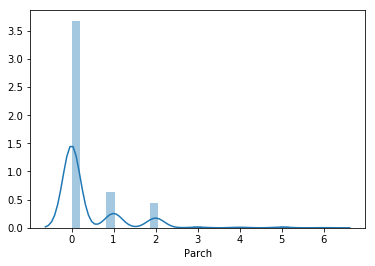

In [36]:
sns.distplot(td['Parch'])

#### Fare
Most of the people have fare of around 10 (assuming the unit is dollar here).

In [37]:
td['Fare'].value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

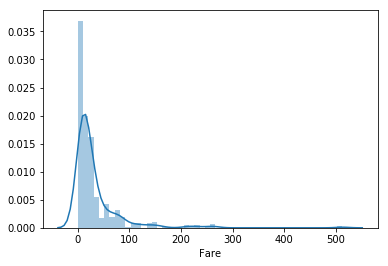

In [38]:
sns.distplot(td['Fare'])

#### Pairwise relationship

In [65]:
nuvar

['Age', 'SibSp', 'Parch', 'Fare']

In [66]:
nuvar[0] = 'Age_all'   # replace age with age_all because seaborn.pairplot() doesn't work well with NaN

In [67]:
nuvar

['Age_all', 'SibSp', 'Parch', 'Fare']

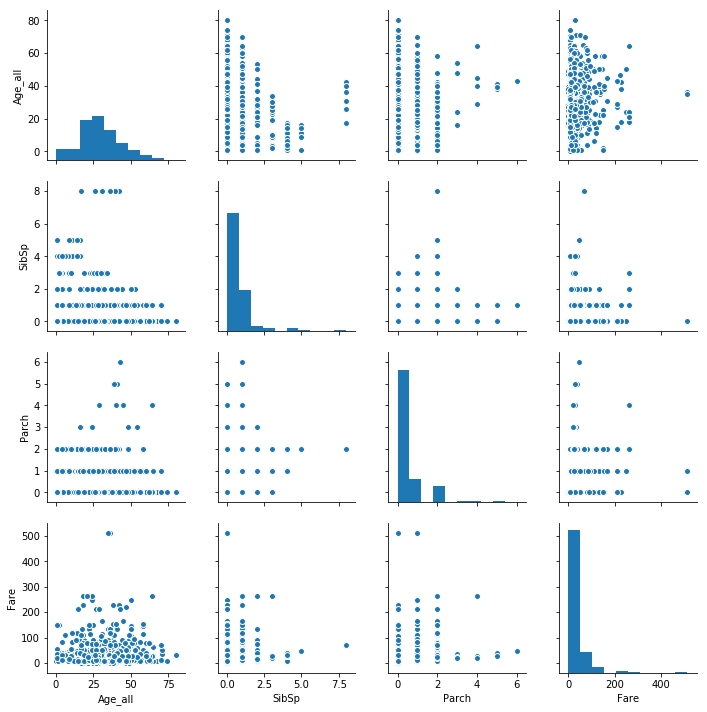

In [68]:
nuvar_df = td[nuvar]
sns.pairplot(nuvar_df)

#### Correlation Matrix

There no strongly related numerical variables except for age and age_all, which is the same feature with and without missing value. 

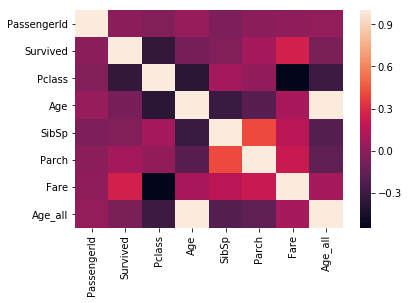

In [70]:
corr = td.corr()
sns.heatmap(corr)

## EDA - Categorical Variable

In [40]:
list(td)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [41]:
catvar = ['Survived','Pclass','Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

#### Survived

In [43]:
td['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Pclass

In [44]:
td['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [138]:
td['Pclass'] = td['Pclass'].astype('category') # Convert Pclass from int type to category

## difference between object and category type?

In [141]:
td['Pclass'].dtype

CategoricalDtype(categories=[1, 2, 3], ordered=False)

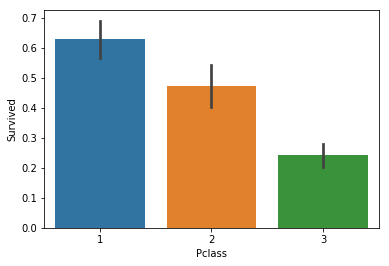

In [142]:
sns.barplot(x="Pclass", y="Survived", data=td);

#### Sex

In [75]:
td['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

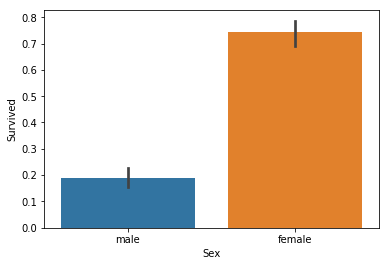

In [76]:
sns.barplot(x='Sex', y='Survived', data=td)

#### Ticket

In [77]:
td['Ticket'].value_counts()

347082                7
1601                  7
CA. 2343              7
CA 2144               6
3101295               6
347088                6
382652                5
S.O.C. 14879          5
113781                4
2666                  4
113760                4
19950                 4
349909                4
PC 17757              4
347077                4
W./C. 6608            4
17421                 4
LINE                  4
4133                  4
248727                3
C.A. 31921            3
24160                 3
110152                3
345773                3
363291                3
PC 17572              3
110413                3
PC 17755              3
35273                 3
PC 17582              3
                     ..
239855                1
SOTON/OQ 392090       1
315089                1
350050                1
347743                1
2690                  1
A/4. 39886            1
2625                  1
2650                  1
A/5. 3337             1
386525          

#### Cabin

In [79]:
td['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
D              3
F33            3
F2             3
E101           3
B77            2
C52            2
C92            2
E121           2
B5             2
C93            2
C123           2
B18            2
C126           2
C78            2
D20            2
E25            2
E33            2
E8             2
D36            2
D26            2
B49            2
C2             2
B28            2
C83            2
B20            2
C125           2
              ..
A16            1
A24            1
B38            1
A7             1
A19            1
E10            1
C86            1
B37            1
B78            1
D15            1
A32            1
B50            1
A6             1
D11            1
D50            1
D7             1
B102           1
A5             1
A26            1
D49            1
D46            1
C90            1
B19            1
B94            1
E40            1
E34            1
B86            1
C95           

In [103]:
cabinLetter = ['A','B','C','D','E','F','G']
num = []
for i in cabinLetter:
    num.append(len(td[td['Cabin'].str.contains(i, na = False)]))
num

[15, 47, 59, 33, 33, 13, 7]

I guess the letter in the cabin number indicates the location of the seats. So I wanted to see how many people are in each cabin letter. But the Cabin variable has too many missing values to use.

#### Embarked

In [105]:
td['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [109]:
td['Embarked'] = td['Embarked'].fillna('S')  # Use the mode to fill the missing values

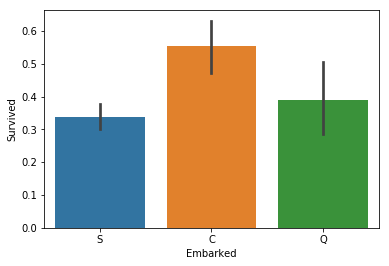

In [110]:
sns.barplot(x='Embarked', y='Survived', data=td)

# how to select catigorical variables? what stats test to use?

## Define Features and Target

In [143]:
Y = td['Survived'].values

In [144]:
list(td)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_all']

In [145]:
feature_list = [
# 'PassengerId',
# 'Survived',
 'Pclass',
# 'Name',
 'Sex',
# 'Age',
 'SibSp',
 'Parch',
# 'Ticket',
 'Fare',
# 'Cabin',
 'Embarked',
 'Age_all']

In [146]:
td[feature_list].info()   # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass      891 non-null category
Sex         891 non-null object
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
Age_all     891 non-null float64
dtypes: category(1), float64(2), int64(2), object(2)
memory usage: 42.8+ KB


## One-hot Encoding

In [151]:
X = pd.get_dummies(td[feature_list])

In [152]:
X

,SibSp,Parch,Fare,Age_all,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,7.2500,22.000000,0,0,1,0,1,0,0,1
1,1,0,71.2833,38.000000,1,0,0,1,0,1,0,0
2,0,0,7.9250,26.000000,0,0,1,1,0,0,0,1
3,1,0,53.1000,35.000000,1,0,0,1,0,0,0,1
4,0,0,8.0500,35.000000,0,0,1,0,1,0,0,1
5,0,0,8.4583,44.500000,0,0,1,0,1,0,1,0
6,0,0,51.8625,54.000000,1,0,0,0,1,0,0,1
7,3,1,21.0750,2.000000,0,0,1,0,1,0,0,1
8,0,2,11.1333,27.000000,0,0,1,1,0,0,0,1
9,1,0,30.0708,14.000000,0,1,0,1,0,1,0,0


In [182]:
feature_list_dummy = list(X)

In [183]:
feature_list_dummy

['SibSp',
 'Parch',
 'Fare',
 'Age_all',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

## Standardize Features for Logistics Regression

In [153]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [154]:
X_scaled = scaler.fit_transform(X)  

In [181]:
X_scaled.shape

(891, 12)

## Train Test Split

In [162]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2)

## Modeling - Logistics Regression

#### Training model

In [163]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [164]:
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predict on training data

In [165]:
train_predict = lr.predict(X_train)

#### Predict on testing data

In [166]:
test_predict = lr.predict(X_test)

## Model performance & Interpretation - Logistics Regression
The performance is not bad.
reference: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [167]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [213]:
def print_results(y_true, y_pred):
    print("Accuracy of the Logistic Regression is: {}".format(accuracy_score(y_true, y_pred)))
    print("Precision of the Logistic Regression is: {}".format(precision_score(y_true, y_pred)))
    print("Recall of the Logistic Regression is: {}".format(recall_score(y_true, y_pred)))
    print("f1-score of the Logistic Regression is: {}".format(f1_score(y_true, y_pred)))
    print("Area Under Curve (AUC) of the Logistic Regression is: {}".format(roc_auc_score(y_true, y_pred)))

In [214]:
print("Training set scores:")
print_results(Y_train, train_predict)

Training set scores:
Accuracy of the Logistic Regression is: 0.7963483146067416
Precision of the Logistic Regression is: 0.757085020242915
Recall of the Logistic Regression is: 0.6875
f1-score of the Logistic Regression is: 0.7206165703275531
Area Under Curve (AUC) of the Logistic Regression is: 0.7755681818181819


In [215]:
print("Testing set scores:")
print_results(Y_test, test_predict)

Testing set scores:
Accuracy of the Logistic Regression is: 0.7486033519553073
Precision of the Logistic Regression is: 0.6923076923076923
Recall of the Logistic Regression is: 0.6428571428571429
f1-score of the Logistic Regression is: 0.6666666666666666
Area Under Curve (AUC) of the Logistic Regression is: 0.7296854521625163


In [211]:
from sklearn.metrics import roc_curve
#reference: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

In [209]:
Y_test_pred_proba = lr.predict_proba(X_test)[:,1]

In [212]:
FalsePositiveRate, TruePositiveRate, thresholds = roc_curve(Y_test, Y_test_pred_proba)

In [220]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use("ggplot")

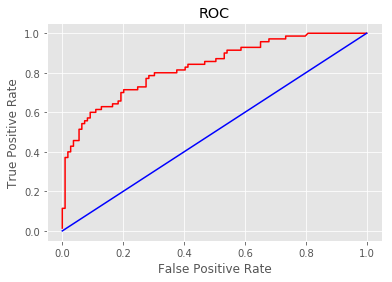

In [221]:
# plot TPR against FPR
plt.plot(FalsePositiveRate, TruePositiveRate, color='red')

# plot 45 degree line
xx = np.linspace(0, 1.0, 20)
plt.plot(xx, xx, color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")

plt.show()

#### Understand Estimated Coefficients
Since I standardized the variables, so estimated coefficients can reveal which variable has bigger predicting power.From the result, female are more likely to survive, and people in class 1 are more likely to survive. Also, the higher people paid as fare, the more likely they are to survive. 
# is my interpretation fair???

In [193]:
#lr.coef_.flatten()  
#reference: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html

In [194]:
#list(zip(feature_list_dummy, lr.coef_))

In [184]:
df_coeffs = pd.DataFrame(list(zip(feature_list_dummy, lr.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs

,feature,coeff
7,Sex_female,0.678142
4,Pclass_1,0.497506
2,Fare,0.208509
10,Embarked_Q,0.100541
5,Pclass_2,0.070386
9,Embarked_C,-0.016586
1,Parch,-0.031409
11,Embarked_S,-0.048740
0,SibSp,-0.350557
3,Age_all,-0.433901


In [ ]:
Model 